In [57]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import time
import scipy.stats as st #最頻値計算のため
import codecs as co

サンプル生成

In [15]:
class Sample:
    
    def __init__(self, seed = 1): 
        self.seed = seed
        self.np = np
        self.np.random.seed(seed)
        return 
    
    def generate2d(self, n, ave, sig, x1_shift = 0, x2_shift = 0):
        _a = self.np.random.normal(ave, sig, 2*n)
        return _a[:n]+x1_shift, _a[n:]+x2_shift
        

k-NN法

In [91]:
class KNeighbors():
    def __init__(self):
        self.n_neighbors = None
        self.x_train = None
        self.y_train = None

    def fit(self, x_train, y_train, n_neighbors):
        self.x_train = x_train
        self.y_train = y_train
        self.n_neighbors = n_neighbors

    def predict(self, x_test, y_test):
        y = np.array(y_test)
        ypre = np.zeros(y.shape)
        ytmp = []
        for i in range(x_test.shape[0]):
            #与えられたテストデータと学習データ間のベクトル，ノルムを計算している(距離)
            distances = np.array([np.linalg.norm(self.x_train[j] - x_test[i]) for j in range(self.x_train.shape[0])])
            #argsort  昇順にデータを並べた時のそのデータのインデックスを返す　　n_neighbors の数だけ j が並ぶ
            neighbors_index = np.argsort(distances)[:self.n_neighbors]
            #print(neighbors_index)
            for k in range(neighbors_index.shape[0]):
                #各インデックスに属するデータのクラスを格納
                ytmp.append(self.y_train[neighbors_index[k]][0])
            #最頻値を予測クラスとする
            ypre[i] = st.mode(ytmp)[0][0]
            ytmp.clear()
            
        print("class1:{}/{}({}%)".format(np.count_nonzero((y==ypre) & (y==1)), np.count_nonzero(y==1), 100 * np.count_nonzero((y==ypre) & (y==1))/np.count_nonzero(y==1)))
        
        print("class2:{}/{}({}%)".format(np.count_nonzero((y==ypre) & (y==2)), np.count_nonzero(y==2), 100 * np.count_nonzero((y==ypre) & (y==2))/np.count_nonzero(y==2)))
        
        print("class3:{}/{}({}%)".format(np.count_nonzero((y==ypre) & (y==3)), np.count_nonzero(y==3), 100 * np.count_nonzero((y==ypre) & (y==3))/np.count_nonzero(y==3)))
        
        print("class4:{}/{}({}%)".format(np.count_nonzero((y==ypre) & (y==4)), np.count_nonzero(y==4), 100 * np.count_nonzero((y==ypre) & (y==4))/np.count_nonzero(y==4)))

        print("class5:{}/{}({}%)".format(np.count_nonzero((y==ypre) & (y==5)), np.count_nonzero(y==5), 100 * np.count_nonzero((y==ypre) & (y==5))/np.count_nonzero(y==5)))


データ作成

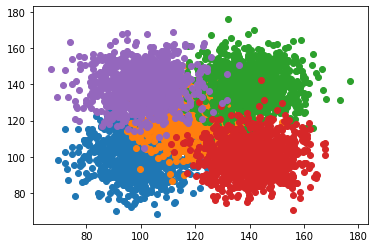

In [92]:
# data生成
data_num = 5 # 使うデータ数
s_x1 = np.zeros((1000,10))
s_x2 = np.zeros((1000,10))
s_x1[:,0], s_x2[:,0] = Sample(1).generate2d(1000, 100, 10)
s_x1[:,1], s_x2[:,1] = Sample(2).generate2d(1000, 120, 10)
s_x1[:,2], s_x2[:,2] = Sample(3).generate2d(1000, 140, 10)
s_x1[:,3], s_x2[:,3] = Sample(4).generate2d(1000, 100, 10, x1_shift = 40)
s_x1[:,4], s_x2[:,4] = Sample(5).generate2d(1000, 100, 10, x2_shift = 40)
s_x1[:,5], s_x2[:,5] = Sample(6).generate2d(1000, 180, 10)
s_x1[:,6], s_x2[:,6] = Sample(7).generate2d(1000, 140, 10, x1_shift = 40)
s_x1[:,7], s_x2[:,7] = Sample(8).generate2d(1000, 140, 10, x2_shift = 40)
s_x1[:,8], s_x2[:,8] = Sample(9).generate2d(1000, 100, 10, x1_shift = 80)
s_x1[:,9], s_x2[:,9] = Sample(10).generate2d(1000, 100, 10, x2_shift = 80)

for i in range(data_num):
    plt.scatter(s_x1[:,i], s_x2[:,i])

plt.show()
plt.close()

for i in range(data_num):
    exec("df{} = pd.DataFrame({{\'y\': {}, \'x1\': s_x1[:,i], \'x2\': s_x2[:,i]}})".format(i+1, i+1))

# shuffle
df = df1
for i in range(data_num-1):
    exec("df = pd.concat([df, df{}]).sample(frac=1).reset_index(drop=True)".format(i+2))
#display(df.head())

# すでにshuffleされているためshuffleはfalse
# これらの値はDataFrame
x_train, x_test, y_train, y_test = train_test_split(df[['x1', 'x2']].values, df[['y']].values, test_size=0.2, shuffle = False)

分類

In [93]:
for i in range(33):
    if i%2 == 1:
        n_neighbors = i
        print(n_neighbors)
        # --- my KNeighbors
        clf_m = KNeighbors()
        clf_m.fit(x_train, y_train, n_neighbors)
        start = time.time()
        clf_m.predict(x_test, y_test)
        print('test time:{}s'.format(time.time()-start))
        print('\n')

1
class1:179/211(84.83412322274881%)
class2:139/209(66.50717703349282%)
class3:171/202(84.65346534653466%)
class4:157/188(83.51063829787235%)
class5:161/190(84.73684210526316%)
test time:25.429190158843994s


3
class1:188/211(89.0995260663507%)
class2:148/209(70.8133971291866%)
class3:182/202(90.0990099009901%)
class4:164/188(87.23404255319149%)
class5:168/190(88.42105263157895%)
test time:24.978918075561523s


5
class1:193/211(91.4691943127962%)
class2:149/209(71.29186602870813%)
class3:187/202(92.57425742574257%)
class4:164/188(87.23404255319149%)
class5:171/190(90.0%)
test time:25.265212059020996s


7
class1:191/211(90.52132701421802%)
class2:149/209(71.29186602870813%)
class3:184/202(91.08910891089108%)
class4:170/188(90.42553191489361%)
class5:172/190(90.52631578947368%)
test time:25.516986846923828s


9
class1:192/211(90.99526066350711%)
class2:152/209(72.72727272727273%)
class3:187/202(92.57425742574257%)
class4:170/188(90.42553191489361%)
class5:173/190(91.05263157894737%)
test